## Imports

In [4]:
import pandas as pd
import numpy as np
from itertools import combinations

# Exploring data

In [2]:
data_file = '../tdt05-2021-challenge-2/challenge2_train.csv'

In [5]:
df = pd.read_csv(data_file)

In [9]:
df

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,1.0,gL,e,3.0,A,NaN,0.0,6.0,...,0.5,0.0,3.0,R,328b0cf4e,0.834041,T,N,1.0,14.2364
1,1,0,0.0,Rj,c,1.0,A,7.0,1.0,4.0,...,0.4,0.0,1.0,NaN,328b0cf4e,0.686021,T,N,1.0,NaN
2,2,0,NaN,In,a,1.0,A,10.0,1.0,6.0,...,0.5,1.0,3.0,G,0c67fcbbd,1.141271,T,N,3.0,NaN
3,3,1,1.0,rA,c,3.0,A,7.0,1.0,1.0,...,0.6,1.0,1.0,G,fee4e3007,0.662382,T,N,3.0,NaN
4,4,0,1.0,pE,c,3.0,A,7.0,0.0,6.0,...,0.5,0.0,1.0,B,587e040bd,-1.000000,T,N,1.0,13.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1,0.0,tT,d,3.0,NaN,11.0,0.0,1.0,...,0.6,1.0,1.0,R,72ccba7a4,0.890576,T,N,3.0,14.0466
49996,49996,0,1.0,pB,b,2.0,A,7.0,0.0,6.0,...,0.1,0.0,7.0,R,250eea49d,NaN,T,N,1.0,14.0157
49997,49997,0,0.0,TL,e,1.0,A,11.0,0.0,6.0,...,NaN,0.0,7.0,G,110d4786e,1.327592,T,N,1.0,13.9255
49998,49998,0,0.0,Bx,a,1.0,A,7.0,1.0,4.0,...,0.4,0.0,3.0,R,0dcf409af,0.842615,T,S,1.0,14.3062


<AxesSubplot:>

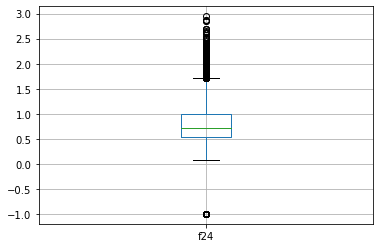

In [11]:
df.boxplot('f24')

In [39]:
datadf = df.drop(['id'], axis=1)
cols = datadf.columns.tolist()

#datadf.fillna('missing', inplace=True)

datadf_f1_f2 = datadf[['f3', 'f2']]
cols_f1_f2 = datadf_f1_f2.columns.tolist()
i = 0
old_prem_col = None

for col1, col2 in combinations(cols_f1_f2, 2):
    if old_prem_col != col1:
        old_prem_col = col1
        print(f'\n\n|---------------{col1}------------------|\n\n')
    if len(datadf_f1_f2[col1].unique()) >= len(datadf_f1_f2[col2].unique()):
        ind = col1
        ccc = col2
    else:
        ind = col2
        ccc = col1
    cooc_df = pd.crosstab(datadf_f1_f2[ind], datadf_f1_f2[ccc], normalize="index", dropna=False)
    if col1 == 'target':
        cooc_df.sort_values(by=0, ascending=False, inplace=True)
    else:
        cooc_df.dropna() #'missing', axis=1, inplace=True)
    print(cooc_df.to_string())
    print('\n\n|--------------------------------------------|\n\n')

    



|---------------f3------------------|


f3       1.0       2.0       3.0
f2                              
a   0.387558  0.273824  0.338618
b   0.410865  0.261859  0.327276
c   0.392546  0.258556  0.348898
d   0.387959  0.269462  0.342580
e   0.389143  0.279291  0.331566
f   0.398195  0.269860  0.331945


|--------------------------------------------|




In [42]:
datadf_f1_f2

,f3,f2
0,3.0,e
1,1.0,c
2,1.0,a
3,3.0,c
4,3.0,c
...,...,...
49995,3.0,d
49996,2.0,b
49997,1.0,e
49998,1.0,a


TypeError: 'value' must be an instance of str or bytes, not a float

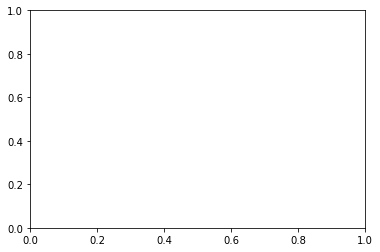

In [41]:
datadf_f1_f2.plot.scatter(x='f3', y='f2')

In [6]:
df['f28'].value_counts(dropna=False)

NaN        13112
13.5545       39
13.5543       34
13.5546       32
13.5542       32
           ...  
13.6252        1
13.6423        1
13.7330        1
14.3740        1
14.4216        1
Name: f28, Length: 8061, dtype: int64

In [7]:
nda = df['f26'].dropna().unique()
np.sort(nda)

array(['N', 'S'], dtype=object)